# **Imports**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
from sklearn import preprocessing
import math

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# **Data Pre-Processing**



Raw Data

               @relation weather Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4
0                           NaN        NaN        NaN        NaN        NaN
1     @attribute outlook {sunny   overcast     rainy}        NaN        NaN
2   @attribute temperature real        NaN        NaN        NaN        NaN
3      @attribute humidity real        NaN        NaN        NaN        NaN
4        @attribute windy {TRUE     FALSE}        NaN        NaN        NaN
5          @attribute play {yes        no}        NaN        NaN        NaN
6                           NaN        NaN        NaN        NaN        NaN
7                         @data        NaN        NaN        NaN        NaN
8                         sunny         85         85      False         no
9                         sunny         80         90       True         no
10                     overcast         83         86      False        yes
11                        rainy         70         96      False        yes

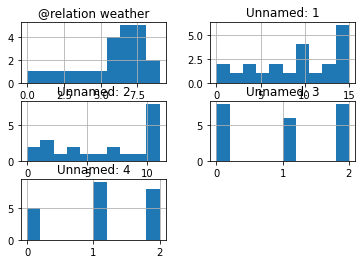

In [8]:
data = pd.read_csv("weather.csv")

print("\n\nRaw Data\n\n",data)



data = data.apply(preprocessing.LabelEncoder().fit_transform)
data.hist()
print(data.describe())
"""
# per column in case some are some are not categorical 

labelencoder = preprocessing.LabelEncoder()
data["outlook"] = labelencoder.fit_transform(data["outlook"])
data["temp"] = labelencoder.fit_transform(data["temp"])
data["humidity"] = labelencoder.fit_transform(data["humidity"])
data["wind"] = labelencoder.fit_transform(data["wind"])
data["play"] = labelencoder.fit_transform(data["play"])
"""

print("\n\nPreprocessed Data\n\n",data)

array = data.values
attributes = array[:,0:4]
classValues = array[:,4]


# **Linear Regression**

In [9]:
model = LinearRegression()

model.fit(attributes,classValues)

results = model.score(attributes,classValues)


# That is trained, lets make some predictions!
print()
unsceen1 = [[2,1,0,1]]
result1 = model.predict(unsceen1)
print(result1[0])

print()
unsceen2 = [[0,1,0,1]]
result2 = model.predict(unsceen2)
print(result2[0])


# for humans using the method from Andrew NG converting it to a classification algorithm!
print()
print()
if result1[0] < 0.5:
    print("Do not play")
else:
    print("Play")
    
    
if result2[0] < 0.5:
    print("Do not play")
else:
    print("Play")


1.282567193305653

1.4699123179970512


Play
Play


# **Linear Regression in more detail:**

In [10]:
from IPython.display import Image
Image("lr.png", width = 600, height = 300)

In [11]:
from IPython.display import Image
Image("mse.png", width = 900, height = 450)

In [12]:
from IPython.display import Image
Image("gradientDescent.jpg", width = 900, height = 450)

A cost function determines how much error exists in a model. This allows us to then adjust the parameters (Intercept and Coefficient).

In Linear Regression, Mean Squared Error (MSE) cost function is used, which is the average of squared error that occurred between the predicted values and actual values.

By simple linear equation y=mx+b we can calculate MSE as (Where: y = actual values, yi = predicted values):

# **Linear Regression - Once Trained**

Performance (R squared): 0.5665

Intercept: 1.0127116508272722
Slope    : [-0.09367256  0.01321456  0.01828387  0.4439861 ]

Attribute 1: y = 1.01 + -0.09x
Attribute 2: y = 1.01 + 0.01x
Attribute 3: y = 1.01 + 0.02x
Attribute 4: y = 1.01 + 0.44x


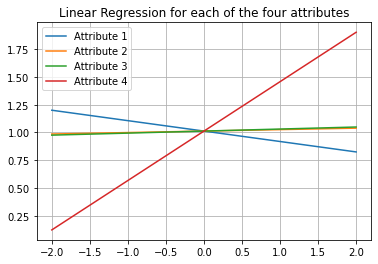

In [13]:
print("Performance (R squared):" , round(results,4))
print()

# LR Intercept (C)
print("Intercept:", model.intercept_)

# LR Slope (M) one for each parameter
print("Slope    :", model.coef_)

print()

print("Attribute 1: y =", round(model.intercept_,2),"+", str(round(model.coef_[0],2))+"x")
print("Attribute 2: y =", round(model.intercept_,2),"+", str(round(model.coef_[1],2))+"x")
print("Attribute 3: y =", round(model.intercept_,2),"+", str(round(model.coef_[2],2))+"x")
print("Attribute 4: y =", round(model.intercept_,2),"+", str(round(model.coef_[3],2))+"x")

# Plotting each line:
att = 1
x = np.linspace(-2,2,100)

plt.title("Linear Regression for each of the four attributes")
for coef in model.coef_:   
    y = coef*x+model.intercept_
    name = "Attribute " + str(att)
    plt.plot(x, y, label=name)
    att += 1
plt.grid()
plt.legend()
plt.show()

In [14]:
# Model prediction
unsceen1 = [[2,1,0,1]]
result1 = model.predict(unsceen1)
print("y - Model generated:\t", result1[0])

# Manual creation of prediction 
unsceenM = [2,1,0,1]
y = model.intercept_ +  (model.coef_[0]*unsceenM[0]) + \
                        (model.coef_[1]*unsceenM[1]) + \
                        (model.coef_[2]*unsceenM[2]) + \
                        (model.coef_[3]*unsceenM[3])
print("y - Manually generated:\t", y)

y - Model generated:	 1.282567193305653
y - Manually generated:	 1.282567193305653


# **Logistic Regression**

In [15]:
model = LogisticRegression()

model.fit(attributes,classValues)

results = model.score(attributes,classValues)


print()
unsceen1 = [[2,1,0,1]]
result1 = model.predict(unsceen1)
print(result1[0])

print()
unsceen2 = [[0,1,0,1]]
result2 = model.predict(unsceen2)
print(result2[0])


# for humans!
print()
print()
if result1[0] == 0:
    print("Do not play")
else:
    print("Play")
    
    
if result2[0] == 0:
    print("Do not play")
else:
    print("Play")


1

1


Play
Play


# **Logistic Regression - Once Trained**

Accuracy: 90.9091 %
Intercept Bo  : -2.6452413521266673
Coef B1       : [ 0.6393695  -0.10510932 -0.05091173 -0.26866412]

Attribute 1: h0(x) = 1 / 1 + e-( -2.65 + 0.64x)
Attribute 2: h0(x) = 1 / 1 + e-( -2.65 + -0.11x)
Attribute 3: h0(x) = 1 / 1 + e-( -2.65 + -0.05x)
Attribute 4: h0(x) = 1 / 1 + e-( -2.65 + -0.27x)


ValueError: ignored

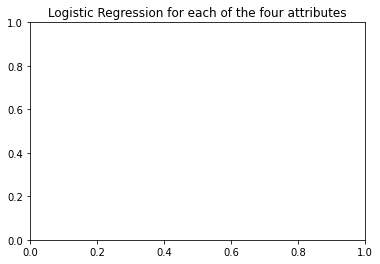

In [18]:
print("Accuracy:", round(results *100,4), "%")

# intercept Bo
print("Intercept Bo  :", model.intercept_[0])

# Coef one for each parameter
print("Coef B1       :", model.coef_[0])

print()

print("Attribute 1: h0(x) =", "1 / 1 + e-(",round(model.intercept_[0],2),"+", str(round(model.coef_[0][0],2))+"x)")
print("Attribute 2: h0(x) =", "1 / 1 + e-(",round(model.intercept_[0],2),"+", str(round(model.coef_[0][1],2))+"x)")
print("Attribute 3: h0(x) =", "1 / 1 + e-(",round(model.intercept_[0],2),"+", str(round(model.coef_[0][2],2))+"x)")
print("Attribute 4: h0(x) =", "1 / 1 + e-(",round(model.intercept_[0],2),"+", str(round(model.coef_[0][3],2))+"x)")


# Plotting each line:
att = 1
x = np.linspace(-10,10,100)

plt.title("Logistic Regression for each of the four attributes")
for coef in model.coef_[0]:   
    y = 1 / (1 + np.exp((coef*x)+model.intercept_))
    name = "Attribute " + str(att)
    plt.plot(x, y, label=name)
    att += 1
plt.grid()
plt.legend()
plt.show()

In [19]:
print()
unsceen1 = [[2,1,0,1]]
result1 = model.predict_proba(unsceen1)
print("SKLearn:  ", result1[0])

#manual
unsceenM = [2,1,0,1]
y = 1 / (1 + math.exp(model.intercept_[0] + (model.coef_[0][0]*unsceenM[0]) + (model.coef_[0][1]*unsceenM[1]) + (model.coef_[0][2]*unsceenM[2]) + (model.coef_[0][3]*unsceenM[3])          ))
print("Manual :   [" +str(round(y,8)) +" "+ str(round(1-y,8)) +"]")


SKLearn:   [0.01929274 0.90454611 0.07616115]
Manual :   [0.85072209 0.14927791]


# **KNN**

In [20]:
model = KNeighborsClassifier(n_neighbors=3, p = 2)

model.fit(attributes,classValues)

results = model.score(attributes,classValues)


print()
unsceen1 = [[2,1,0,1]]
result1 = model.predict(unsceen1)
print(result1[0])

print()
unsceen2 = [[0,1,0,1]]
result2 = model.predict(unsceen2)
print(result2[0])


# for humans!
print()
print()
if result1[0] == 0:
    print("Do not play")
else:
    print("Play")
    
    
if result2[0] == 0:
    print("Do not play")
else:
    print("Play")


0

0


Do not play
Do not play


Retreiving the nearest neighbours and their indices


In [21]:
distances, indices = model.kneighbors(unsceen1)
print("Nearest Three Distances")
print(distances)
print("\nIndices of top Three")
print(indices)

Nearest Three Distances
[[1.73205081 4.58257569 6.164414  ]]

Indices of top Three
[[ 1 14 13]]


Elbow Method for Selection of K:


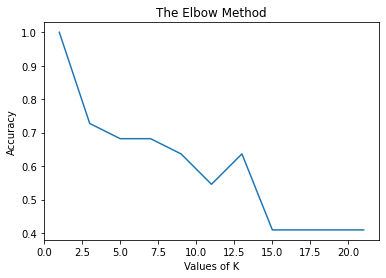

In [22]:
# elbow method
accValues = []  
for k in range(1,len(attributes),2): 
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(attributes, classValues)
    results = model.score(attributes, classValues)
    accValues.append(results.mean())

plt.plot(list(range(1,len(attributes),2)),accValues) 
plt.xlabel('Values of K') 
plt.ylabel('Accuracy') 
plt.title('The Elbow Method') 
plt.show()

# **Nieve Bayes**

In [23]:
model = GaussianNB()

model.fit(attributes,classValues)

results = model.score(attributes,classValues)


print()
unsceen1 = [[2,1,0,1]]
result1 = model.predict(unsceen1)
print(result1[0])

print()
unsceen2 = [[0,1,0,1]]
result2 = model.predict(unsceen2)
print(result2[0])


# for humans!
print()
print()
if result1[0] == 0:
    print("Do not play")
else:
    print("Play")
    
    
if result2[0] == 0:
    print("Do not play")
else:
    print("Play")


1

1


Play
Play


Both class values probabilities


In [24]:
print("Unsceen 1\n")
prob = model.predict_proba(unsceen1)
# returns the prob for each class [0, 1]
print("Predicted prob class 0:",  prob[0][0])
print("Predicted prob class 1:",  prob[0][1])

print("\n\nUnsceen 2\n")
prob = model.predict_proba(unsceen2)
# returns the prob for each class [0, 1]
print("Predicted prob class 0:",  prob[0][0])
print("Predicted prob class 1:",  prob[0][1])

Unsceen 1

Predicted prob class 0: 9.016448540967736e-22
Predicted prob class 1: 1.0


Unsceen 2

Predicted prob class 0: 1.5806428451959759e-37
Predicted prob class 1: 1.0


# **Decision Tree**

In [25]:
model = DecisionTreeClassifier()

model.fit(attributes,classValues)

results = model.score(attributes,classValues)


print()
unsceen1 = [[2,1,0,1]]
result1 = model.predict(unsceen1)
print(result1[0])

print()
unsceen2 = [[0,1,0,1]]
result2 = model.predict(unsceen2)
print(result2[0])


# for humans!
print()
print()
if result1[0] < 0.5:
    print("Do not play")
else:
    print("Play")
    
    
if result2[0] < 0.5:
    print("Do not play")
else:
    print("Play")


1

1


Play
Play


In [26]:
print("Accuracy:", round(results *100,4), "%\n\n")

# Visualise the tree
text_representation = tree.export_text(model)
print(text_representation)

Accuracy: 100.0 %


|--- feature_3 <= 1.50
|   |--- feature_0 <= 6.50
|   |   |--- class: 1
|   |--- feature_0 >  6.50
|   |   |--- feature_2 <= 4.50
|   |   |   |--- feature_1 <= 4.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  4.50
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.50
|   |   |   |--- feature_1 <= 7.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  7.50
|   |   |   |   |--- class: 0
|--- feature_3 >  1.50
|   |--- class: 2

